In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sos
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import normalize
from scipy.stats import boxcox, probplot, norm, shapiro
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from time import time
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
df.columns = ['age', 'job', 'marital', 'education', 'credit', 'housing', 'loan','contact', 'month', 'day_of_week',
              'duration', 'campaign', 'pdays','previous', 'poutcome', 'emp.var.rate', 'cons.price.idx','cons.conf.idx',
              'euribor3m', 'nr.employed', 'subscribed']
df.head()

,age,job,marital,education,credit,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
credit            41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
subscribed        41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [4]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
credit            0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribed        0
dtype: int64

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


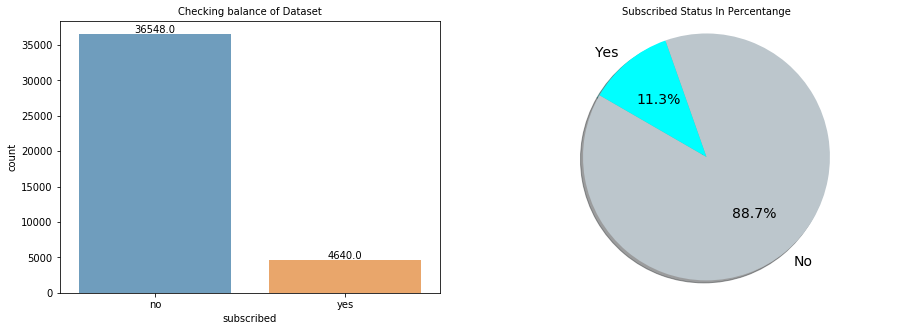

In [6]:
plt.rcParams['figure.figsize']=15,5
plt.subplot(121)
plt.title('Checking balance of Dataset', fontsize=10)
s = sns.countplot(x="subscribed", data=df, alpha=0.7)
for p in s.patches:
    s.annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 4), 
                textcoords = 'offset points')


ax = plt.subplot(122)
mush_classpie = df['subscribed'].value_counts()
mush_size = mush_classpie.values.tolist()
mush_types = mush_classpie.axes[0].tolist()
mush_labels = 'No', 'Yes'
colors = ['#BCC6CC', '#00FFFF']
plt.title('Subscribed Status In Percentange', fontsize=10)
patches, texts, autotexts = plt.pie(mush_size, labels=mush_labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=150)
for text,autotext in zip(texts,autotexts):
    text.set_fontsize(14)
    autotext.set_fontsize(14)

plt.axis('equal')  
plt.show()

Text(0.5, 0, '---Job---')

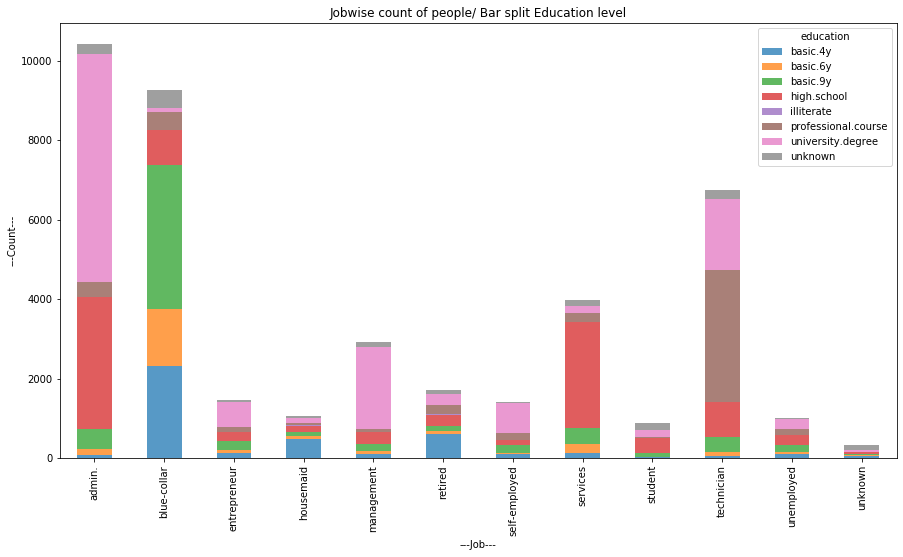

In [7]:
df_pivot = pd.pivot_table(df,columns='education', index='job', aggfunc='count',values='age')
df_pivot.plot(kind='bar',stacked=True, figsize=(15,8), alpha=0.75)
plt.title('Jobwise count of people/ Bar split Education level')
plt.ylabel('---Count---')
plt.xlabel('---Job---')

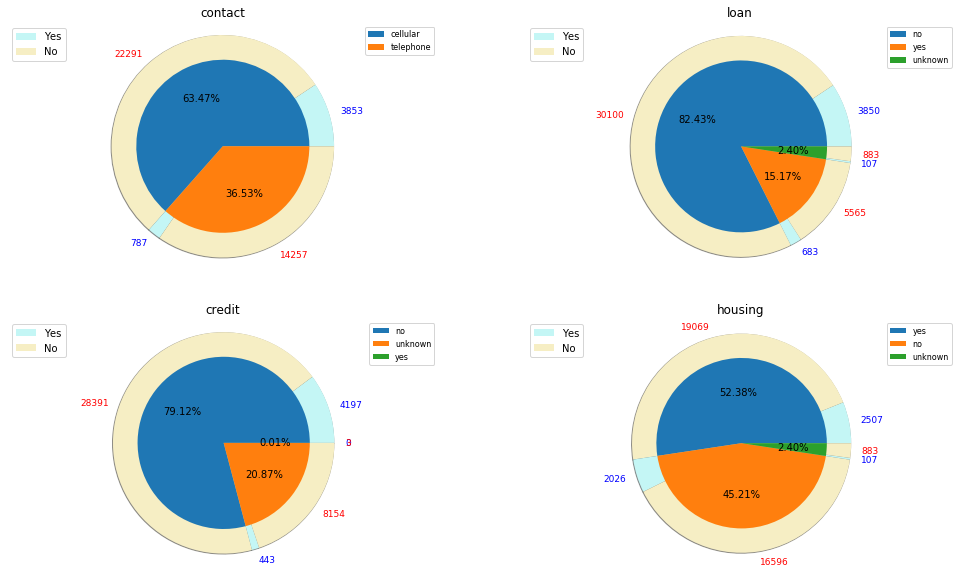

In [8]:
f, axes = plt.subplots(4,1, figsize=(17,10), sharey = True) 
num_col = ['contact', 'loan', 'credit', 'housing']

for j,col in enumerate(num_col):
    cols = df[col].value_counts()
    pop_size = cols.values.tolist()
    pop_types = cols.axes[0].tolist()
    poisonous_pop = [] 
    edible_pop = []   
    for pop in pop_types: 
        size = len(df[df[col] == pop].index)
        edibles = len(df[(df[col] == pop) & (df['subscribed'] == 'yes')].index)
        edible_pop.append(edibles)
        poisonous_pop.append(size-edibles)
    combine_ed_poi = []
    for i in range(0,len(edible_pop)):
        combine_ed_poi.append(edible_pop[i])
        combine_ed_poi.append(poisonous_pop[i])

    #Double pie chart.
    plt.subplot(2,2,j+1)
    plt.title(col)
    #Outer Pie Chart
    patches1, texts1 = plt.pie(combine_ed_poi,radius = 4.5,labels= combine_ed_poi,
                                    colors=['#C4F6F5','#F6EEC4'], shadow=True, labeldistance= 1.1)
    for i in range(0,len(texts1)):
        if(i%2==0):
            texts1[i].set_color('blue')
        else:
            texts1[i].set_color('red')
    for aut in texts1:
        aut.set_fontsize(9)
    #Inner Pie Chart
    patches2, texts2, autotexts2 = plt.pie(pop_size, radius = 3.5,
            autopct='%1.2f%%', shadow=True, labeldistance= 4.2)
    for aut in autotexts2:
        aut.set_fontsize(10)
        aut.set_horizontalalignment('center')
    #Set 2 Legends to the plot.
    first_legend   = plt.legend(patches1, ['Yes','No'], loc="upper left", fontsize=10)
    second_ledgend = plt.legend(patches2, pop_types, loc="best",fontsize=8)
    plt.gca().add_artist(first_legend)
    plt.axis('equal')
plt.show()

In [9]:
def absolute_value(val,month):
    a = round(val*sum(df[df['month']==month].subscribed.value_counts())/100,0)
    return a

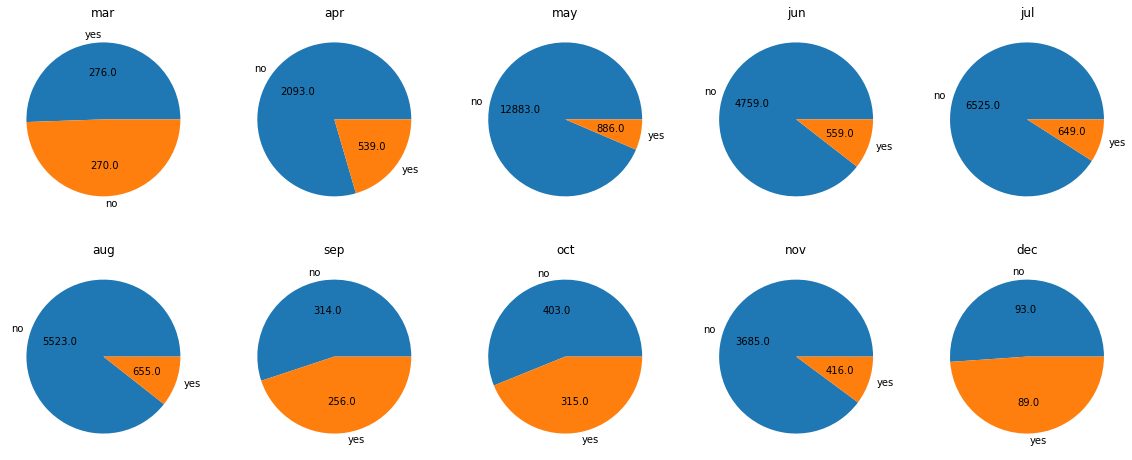

In [10]:
fig, axs = plt.subplots(2,5,figsize=(20,8))
plot_dict=dict(zip(range(0,10),[axs[0,0],axs[0,1],axs[0,2],axs[0,3],axs[0,4],
                     axs[1,0],axs[1,1], axs[1,2], axs[1,3], axs[1,4]]))

#enumerate returns tuple of month and a number(idx)
for idx, month in enumerate(['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']):
    #gets axes from dict and plots on it
    plot_dict.get(idx).pie(df[df['month']==month].subscribed.value_counts(),
             labels=df[df['month']==month].subscribed.value_counts().index, autopct=lambda val: absolute_value(val,month))
    plot_dict.get(idx).set_title(month)

In [11]:
dict_job = {
    "job":{
        "housemaid":1,
        "unemployed":0,
        "entrepreneur":4,
        "blue-collar":1,
        "services":3,
        "admin.":2,
        "technician":2,
        "retired":1,
        "management":4,
        "self-employed":3,
        "unknown":1,
        "student":0.5
    }}
dict_education = {
    "education":{
        "basic.4y":1,
        "basic.6y":1,
        "basic.9y":1,
        "high.school":1,
        "professional.course":2,
        "university.degree":2,
        "illiterate":0.9,
        "unknown":0.9
    }}

dict_poutcome = {
    "poutcome":{
        "nonexistent":0,
        "failure":0,
        "success":1
    }}
dict_y = {
    "subscribed":{
        "no":0,
        "yes":1
    }}

In [12]:
for i in [dict_poutcome,dict_y, dict_education, dict_job]:
    df.replace(i,inplace=True)

In [13]:
df.head()

,age,job,marital,education,credit,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,1.0,married,1.0,no,no,no,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,3.0,married,1.0,unknown,no,no,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,3.0,married,1.0,no,yes,no,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,2.0,married,1.0,no,no,no,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,3.0,married,1.0,no,no,yes,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0


In [14]:
#Encoding rest of the un ordinal categorical variable 
lc_X1 = LabelEncoder()
lst = ['marital','credit','housing','loan']

for i in lst:
    df[i] = lc_X1.fit_transform(df[i])

In [15]:
df_1 = pd.get_dummies(df,
                      columns=['marital','credit','housing','loan'],
                      drop_first=True)
df.head()

,age,job,marital,education,credit,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,1.0,1,1.0,0,0,0,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,3.0,1,1.0,1,0,0,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,3.0,1,1.0,0,2,0,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,2.0,1,1.0,0,0,0,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,3.0,1,1.0,0,0,2,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0


In [16]:
corr = df_1.corr()
print(corr['subscribed'].sort_values(axis=0, ascending=True))

nr.employed      -0.354678
pdays            -0.324914
euribor3m        -0.307771
emp.var.rate     -0.298334
cons.price.idx   -0.136211
credit_1         -0.099293
campaign         -0.066357
marital_1        -0.043398
job              -0.027963
loan_2           -0.004466
credit_2         -0.003041
loan_1           -0.002270
housing_1        -0.002270
marital_3         0.005211
housing_2         0.011743
age               0.030399
education         0.045916
marital_2         0.054133
cons.conf.idx     0.054878
previous          0.230181
poutcome          0.316269
duration          0.405274
subscribed        1.000000
Name: subscribed, dtype: float64


In [17]:
# Let's Remove features that has less correlation
df_1.drop(columns=[
    'nr.employed','pdays','euribor3m','emp.var.rate',
    'cons.price.idx','contact','month','campaign', 'day_of_week'
    ], axis=0, inplace=True)

Text(0.5, 1, 'Correlation')

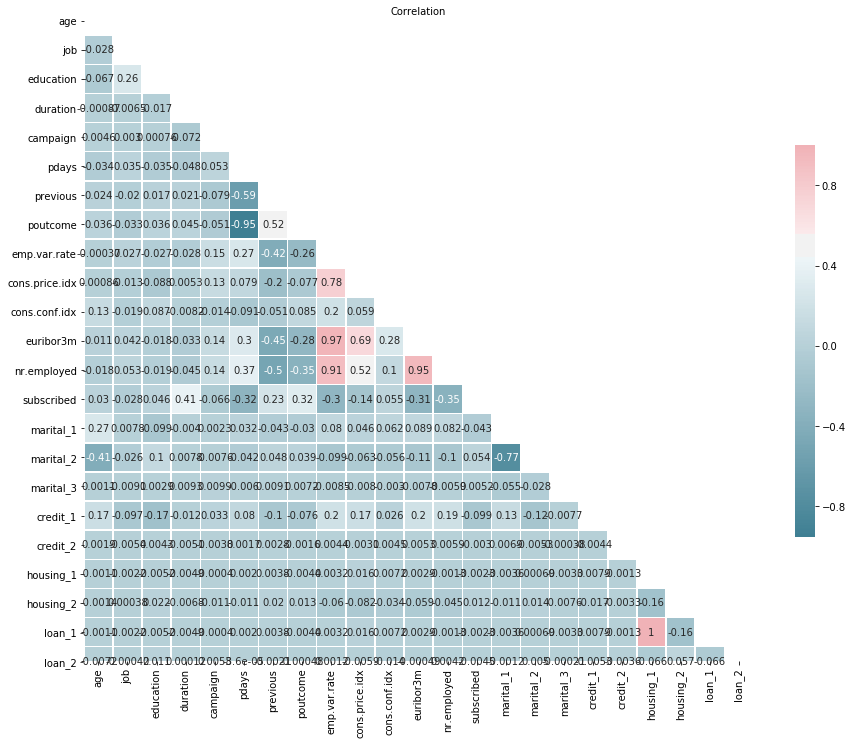

In [18]:
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(15,12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#Drawing heatmap
sns.heatmap(corr, 
            mask=mask,
            cmap=cmap, 
            vmax=1, 
            center=0.5, 
            square=True, 
            linewidths=.5, 
            cbar_kws={"shrink": .6},
            annot=True
           )
plt.title("Correlation", fontsize =10)

In [19]:
X = df_1.drop(columns = 'subscribed',axis=1).values
y = df_1['subscribed'].values 

In [20]:
#split training - test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [21]:
df_1['subscribed'].value_counts()

0    36548
1     4640
Name: subscribed, dtype: int64

In [22]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [23]:
# We are using this function to calculate the accuracy, precision, recall, f1_score etc.
# Hyperparams: model = string, labels = y, pred = model.pred(y)
def print_scores(model, labels, pred):
    # Confusion matrix
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred), 3)    
    recall = round(recall_score(labels, pred), 3)
    f1 = round(f1_score(labels, pred), 3)
    
    cm = confusion_matrix(labels, pred)
    df = pd.DataFrame(cm)
    
    labels = [f"TP: {df[0][0]} ",f"TN: {df[1][1]} ",f"FP: {df[1][0]} ",f"FN: {df[0][1]} "]
    labels = np.asarray(labels).reshape(2,2)
    
    f, ax = plt.subplots(figsize=(6,5))
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', ax=ax)    
    print(f"{model}:: Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, f1_score: {f1}")

In [24]:
# print the cross-validation results
def print_cv_result(results):
    print(f"Best Params : {results.best_params_}\n")
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print(f'{round(mean, 3)} (+/-{round(std * 2, 3)}) for {params}')

SVM Time:35424.18
SVM:: Accuracy: 0.901, Precision: 0.671, Recall: 0.293, f1_score: 0.408


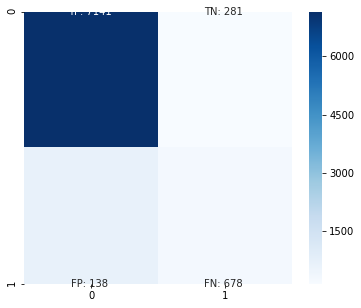

In [25]:
start = time()
svc = SVC(kernel = "rbf", C=10)
svc.fit(X_train,y_train)
y_pred_svm = svc.predict(X_test)
end = time()
print(f"SVM Time:{round((end - start), 5) * 1000}")
print_scores("SVM", y_test, y_pred_svm)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LGR:: Accuracy: 0.901, Precision: 0.664, Recall: 0.309, f1_score: 0.421


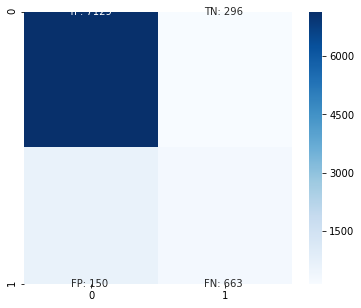

In [26]:
lgr = LogisticRegression()
lgr.fit(X_train, y_train)
y_pred_lgr = lgr.predict(X_test)
print_scores("LGR", y_test, y_pred_lgr)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [28]:
##!pip install xgboost

In [29]:
models = {
    "LR": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "XGB": XGBClassifier()
}

In [30]:
for name, model in models.items():
    print(f'Training Model {name}')
    model.fit(X_train, y_train)
    print(f'Training Accuracy: {model.score(X_train, y_train)}')
    print(f'Testing Accuracy: {model.score(X_test, y_test)}')    
    print('-'*20)

Training Model LR


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training Accuracy: 0.9052200303490137
Testing Accuracy: 0.9013109978150037
--------------------
Training Model KNN
Training Accuracy: 0.9239453717754172
Testing Accuracy: 0.8964554503520272
--------------------
Training Model SVC
Training Accuracy: 0.9085887708649469
Testing Accuracy: 0.898761835396941
--------------------
Training Model DT
Training Accuracy: 0.9999696509863429
Testing Accuracy: 0.885773245933479
--------------------
Training Model RF


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training Accuracy: 0.9926555386949925
Testing Accuracy: 0.898154891964069
--------------------
Training Model XGB
[20:09:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Training Accuracy: 0.9510470409711684
Testing Accuracy: 0.9113862588006798
--------------------


In [31]:
model = XGBClassifier()

model.fit(X_train, y_train)

[20:09:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [32]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [33]:
y_test

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [34]:
df_1.columns

Index(['age', 'job', 'education', 'duration', 'previous', 'poutcome',
       'cons.conf.idx', 'subscribed', 'marital_1', 'marital_2', 'marital_3',
       'credit_1', 'credit_2', 'housing_1', 'housing_2', 'loan_1', 'loan_2'],
      dtype='object')

In [35]:
#import joblib
#joblib.dump(model, 'model.h5')
#joblib.dump(sc, 'scaler.h5')

In [36]:
df_1.head()

,age,job,education,duration,previous,poutcome,cons.conf.idx,subscribed,marital_1,marital_2,marital_3,credit_1,credit_2,housing_1,housing_2,loan_1,loan_2
0,56,1.0,1.0,261,0,0,-36.4,0,1,0,0,0,0,0,0,0,0
1,57,3.0,1.0,149,0,0,-36.4,0,1,0,0,1,0,0,0,0,0
2,37,3.0,1.0,226,0,0,-36.4,0,1,0,0,0,0,0,1,0,0
3,40,2.0,1.0,151,0,0,-36.4,0,1,0,0,0,0,0,0,0,0
4,56,3.0,1.0,307,0,0,-36.4,0,1,0,0,0,0,0,0,0,1


In [47]:
df.groupby('marital').count()

,age,job,education,credit,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
marital,,,,,,,,,,,,,,,,,,,,
0,4612,4612,4612,4612,4612,4612,4612,4612,4612,4612,4612,4612,4612,4612,4612,4612,4612,4612,4612,4612
1,24928,24928,24928,24928,24928,24928,24928,24928,24928,24928,24928,24928,24928,24928,24928,24928,24928,24928,24928,24928
2,11568,11568,11568,11568,11568,11568,11568,11568,11568,11568,11568,11568,11568,11568,11568,11568,11568,11568,11568,11568
3,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80


In [38]:
X_train[0]

array([ 3.73523581, -0.95773878, -0.83759017, -0.59539443,  3.6801034 ,
       -0.18749509,  0.11470832,  0.80980176, -0.62572227, -0.04614059,
       -0.51565078, -0.00779113, -0.15662956, -1.04954137, -0.15662956,
       -0.42320421])

In [39]:
#lst = ['marital','credit','housing','loan']

In [40]:
#marital 0 1 2 3
#credit 0 1 2
#housing 0 1 2 
#loan  0 1 2 